In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

In [4]:
df = pd.read_csv('./bin/9_28_large_result.csv')

In [5]:
replicates =pd.DataFrame(list(df[(df.Process == "True Process")]['Replicate']),columns=['Replicate'])

In [6]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [7]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication_reconcILS'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss_reconcILS'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [8]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication_DLC'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss_DLC'])
ETE3_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [9]:
print(len(True_Duplication))

928


In [10]:
print(len(O_Duplication))

928


In [147]:
print(len(ETE3_Duplication))

836


In [148]:
True_Duplication['Replicate']=replicates
TRUE_Loss['Replicate']=replicates
#ETE3_Duplication['Replicate']=replicates


In [11]:
C_D = pd.concat([True_Duplication,O_Duplication,ETE3_Duplication],axis=1)
C_L = pd.concat([TRUE_Loss,O_Loss,ETE3_Loss],axis=1)
#C_D = pd.concat([True_Duplication,O_Duplication,ETE3_Duplication],axis=1)


In [12]:
df_diff_D = C_D[C_D['Duplication']<C_D['Duplication_reconcILS']].fillna('')
df_diff_L = C_L[C_L['Loss']<C_L['Loss_reconcILS']].fillna('')


In [13]:
df_diff1_D = C_D[(C_D['Duplication_DLC']==C_D['Duplication'])].fillna('')
df_diff2_D =df_diff1_D[(df_diff1_D['Duplication_reconcILS']!=df_diff1_D['Duplication'])].fillna('')

df_diff1_L = C_L[(C_L['Loss_DLC']==C_L['Loss'])].fillna('')
df_diff2_L =df_diff1_L[(df_diff1_L['Loss_reconcILS']!=df_diff1_L['Loss'])].fillna('')


In [14]:
df_diff3 =C_D[(C_D['Duplication_reconcILS']==C_D['Duplication'])].fillna('')
df_diff4 = df_diff3[(df_diff3['Duplication_DLC']!=df_diff3['Duplication'])].fillna('')


df_diff3_L = C_L[(C_L['Loss_reconcILS']==C_L['Loss'])].fillna('')
df_diff4_L =df_diff3_L[(df_diff3_L['Loss_DLC']!=df_diff3_L['Loss'])].fillna('')


In [15]:
df_diff2_L

,Loss,Loss_reconcILS,Loss_DLC
4,6,5,6
6,2,1,2
12,1,4,1
30,2,1,2
46,2,1,2
...,...,...,...
905,5,7,5
909,2,6,2
910,3,4,3
917,1,4,1


In [16]:
df_diff_L

,Loss,Loss_reconcILS,Loss_DLC
8,1,2,3
9,1,6,4
12,1,4,1
14,1,5,2
18,2,3,1
...,...,...,...
910,3,4,3
911,2,3,4
916,1,4,0
917,1,4,1


In [18]:
df_diff_D

,Duplication,Duplication_reconcILS,Duplication_DLC
8,3,4,3
12,0,1,0
18,2,3,2
27,5,6,5
35,3,4,3
...,...,...,...
868,8,9,8
901,3,4,3
905,7,8,7
907,4,5,4


In [27]:
true_reconils_dups= pd.DataFrame(concat_true-concat_O)
val =['reconcILS' for i in range(836)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [28]:
true_ete3_dups= pd.DataFrame((concat_true-concat_ETE3))
val =['DLCpar' for i in range(836)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [172]:
df_diff1_L_ = C_L[(C_L['Loss']==C_L['Loss_reconcILS'])].fillna('')


In [170]:
df_diff1_L = C_L[(C_L['Loss_DLC']==C_L['Loss_reconcILS'])].fillna('')


In [173]:
df_diff1_L_

,Loss,Replicate,Loss_reconcILS,Loss_DLC
0,1,0,1,1
1,1,1,1,0
3,0,3,0,0
4,1,4,1,1
7,1,7,1,1
...,...,...,...,...
824,0,988,0,0
825,1,989,1,1
829,1,993,1,2
833,0,997,0,0


In [31]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [32]:
val

221

In [33]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,0
1,reconcILS,Duplication,0
2,reconcILS,Duplication,1
3,reconcILS,Duplication,0
4,reconcILS,Duplication,0
...,...,...,...
3339,DLCpar,Loss,0
3340,DLCpar,Loss,2
3341,DLCpar,Loss,0
3342,DLCpar,Loss,0


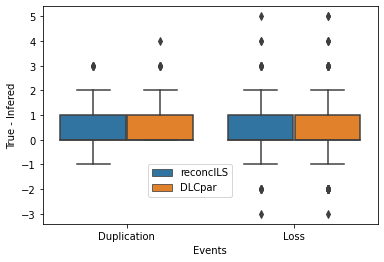

In [34]:
ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("True - Infered")
plt.savefig('box_plot.jpg', dpi=500)


In [35]:
result1

NameError: name 'result1' is not defined

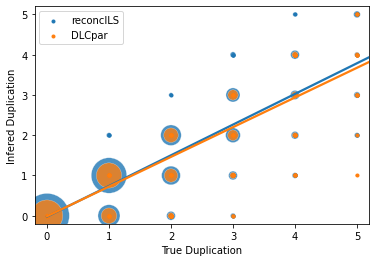

<Figure size 432x288 with 0 Axes>

In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

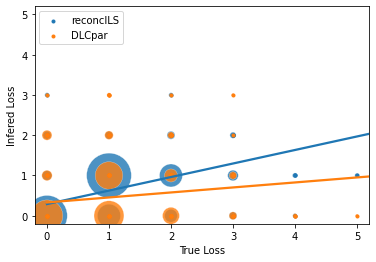

<Figure size 432x288 with 0 Axes>

In [37]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

In [107]:
r =result1.astype('category')

In [108]:
r

,0,1
0,1,1
1,1,1
2,2,1
3,0,0
4,1,1
...,...,...
831,1,0
832,2,1
833,0,0
834,2,1


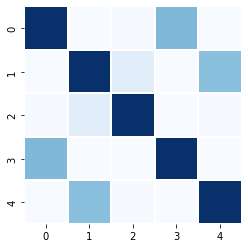

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [67]:
np.array([list(result1[0]), list(result1[1])])

array([[1, 1, 2, ..., 0, 2, 1],
       [1, 1, 1, ..., 0, 1, 1]])

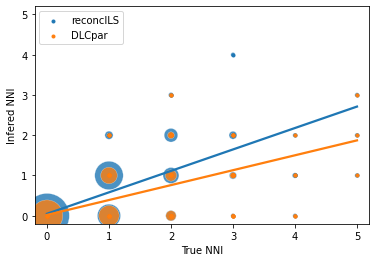

<Figure size 432x288 with 0 Axes>

In [141]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],ETE3_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')

#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True NNI")
plt.ylabel("Infered NNI")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI.png', dpi=500)

plt.show()
plt.clf()

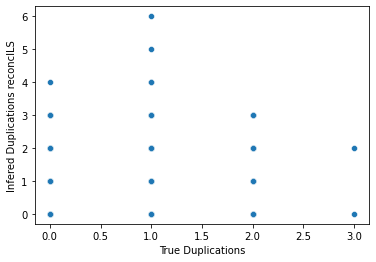

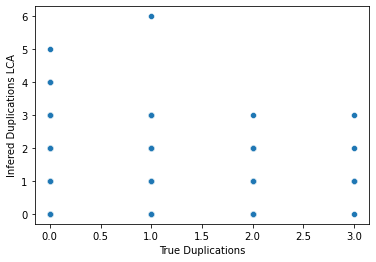

In [69]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

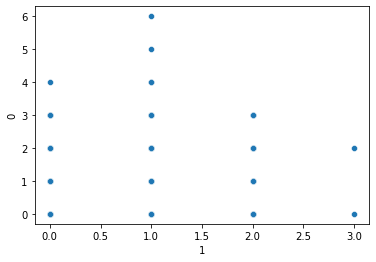

In [70]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [142]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [143]:
rho

0.22715492065611584

In [144]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['NNI']))

In [145]:
rho

0.5857584796166706

In [146]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [147]:
rho

0.8706893376025674

In [148]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['NNI']))

In [149]:
rho

0.8715649781662739

In [150]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [151]:
rho

0.6074316905964681

In [152]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI']))

In [153]:
rho

0.7477744445481845